# Video Game Exploratory Data Analysis

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Read in the data set:
df = pd.read_csv('Resources/games_dataset.csv')

In [3]:
# Display the first 10 rows of the DataFrame:
df.head(10)

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476
5,Counter-Strike: Global Offensive,Puzzle,PlayStation,2023,1.112864
6,Red Dead Redemption 2,Shooter,Xbox,2011,8.353946
7,Halo Infinite,Adventure,PC,2014,7.167983
8,The Legend of Zelda: Breath of the Wild,Horror,Nintendo Switch,2004,8.608596
9,Valorant,Adventure,Mobile,2010,1.336979


In [4]:
# Display a concise summary of your DataFrame
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


In [5]:
# Check for missing values:
missing_values = df.isnull().sum()

# Check if there are any missing values at all
if missing_values.sum() == 0:
    print("\nGreat! There are no missing values in the dataset.")
else:
    print("\nThere are missing values in the dataset. Consider handling them appropriately.")


Great! There are no missing values in the dataset.


# Statisics of the data:

In [6]:
# Numeric Columns:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate statistics
stats = df[numeric_columns].agg(['min', 'max', 'mean', 'median', 'std'])

# Rename the columns for clarity:
stats.index = ['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation']

In [7]:
# Calculation for the 'User Rating':
if 'User Rating' in df.columns:
    print("\nStatistics for User Rating:")
    print(f"Minimum: {df['User Rating'].min()}")
    print(f"Maximum: {df['User Rating'].max()}")
    print(f"Mean: {df['User Rating'].mean()}")
    print(f"Median: {df['User Rating'].median()}")
    print(f"Standard Deviation: {df['User Rating'].std()}")


Statistics for User Rating:
Minimum: 1.005878283961941
Maximum: 9.996196453869272
Mean: 5.524913320102779
Median: 5.574233456489701
Standard Deviation: 2.598429277465372


In [8]:
# Tob 5 Genre:
genre_counts = df['Genre'].value_counts()
top_5_genres = genre_counts.nlargest(5)

print('The top 5 genres are:')
for genre, count in top_5_genres.items():
    print(f'{genre}: {count}')

The top 5 genres are:
Sports: 403
Puzzle: 384
Racing: 369
Simulation: 368
Stealth: 360


In [9]:
# Percentage of games in each genre:
genre_percentages = genre_counts / len(df) * 100
print('Percentage of games in each genre:')
for genre, percentage in genre_percentages.items():
    print(f'{genre}: {percentage:.2f}%')

Percentage of games in each genre:
Sports: 8.06%
Puzzle: 7.68%
Racing: 7.38%
Simulation: 7.36%
Stealth: 7.20%
Role-playing: 7.20%
Horror: 7.12%
Strategy: 7.06%
Survival: 7.06%
Adventure: 6.84%
Action: 6.80%
Platformer: 6.76%
Shooter: 6.74%
Fighting: 6.74%


In [10]:
# Platform distribution:
platform_counts = df['Platform'].value_counts()
print(platform_counts)

Platform
PC                 1056
Xbox               1009
Nintendo Switch     989
Mobile              986
PlayStation         960
Name: count, dtype: int64


In [11]:
# Percentage of games in each genre:
platform_percentages = platform_counts / len(df) * 100
print('Percentage of games in each platform:')
for Platform, percentage in platform_percentages.items():
    print(f'{Platform}: {percentage:.2f}%')

Percentage of games in each platform:
PC: 21.12%
Xbox: 20.18%
Nintendo Switch: 19.78%
Mobile: 19.72%
PlayStation: 19.20%


In [12]:
# List the oldest year value and most recen year value:
print('Oldest and most recent year:')
print(df['Release Year'].min())
print(df['Release Year'].max())
print('Description of data:')
print(df['Release Year'].describe())

Oldest and most recent year:
2000
2023
Description of data:
count    5000.000000
mean     2011.375400
std         6.943984
min      2000.000000
25%      2005.000000
50%      2011.000000
75%      2017.000000
max      2023.000000
Name: Release Year, dtype: float64


# Graphic Representation of Video Game Sales

 Distribution of the number of games released per year:

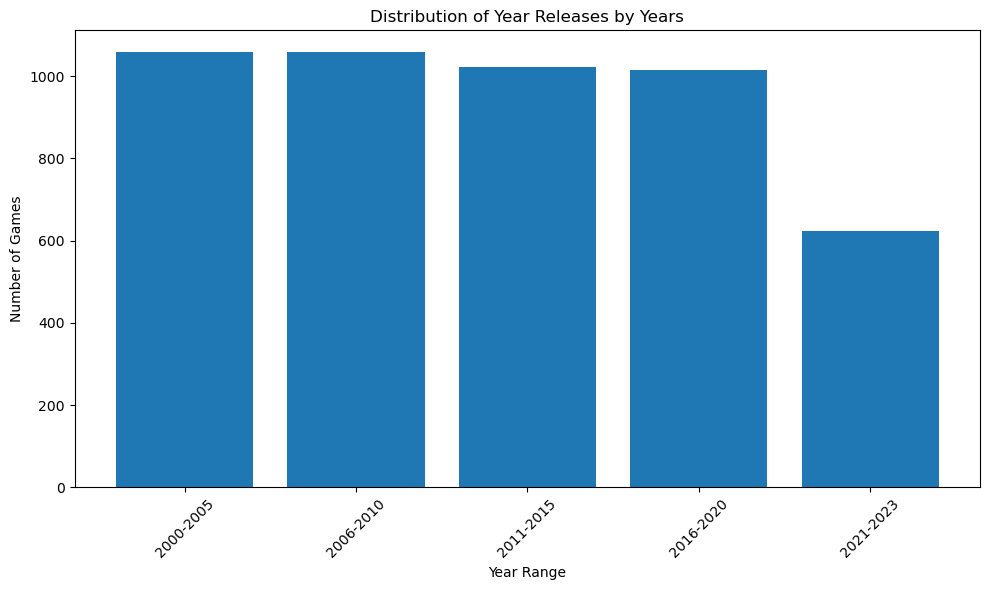

year_range
2000-2005    1059
2006-2010    1058
2011-2015    1023
2016-2020    1016
2021-2023     624
Name: count, dtype: int64

In [13]:
# Distribution of year releases by years; 2000-2005, 2006-2010, 2011-2015, 2016-2020, 2021-2023:
def release_year_distribution(df):
    #Bins for year ranges:
    bins = [2000, 2005, 2010, 2015, 2020, 2023]
    labels = ['2000-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2023']

    # Create a new column with binned years and count the number of games in each bin:
    df['year_range'] = pd.cut(df['Release Year'], bins=bins, labels=labels)

    year_counts = df['year_range'].value_counts().sort_index()

    # Create a bar plot:
    plt.figure(figsize=(10, 6))
    plt.bar(year_counts.index, year_counts.values)
    plt.xlabel('Year Range')
    plt.ylabel('Number of Games')
    plt.title('Distribution of Year Releases by Years')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return year_counts

# Convert 'Release Year' column to numeric type
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')

# Drop rows with NaN values in 'Release Year' column
df = df.dropna(subset=['Release Year'])

release_year_distribution(df)

Genre distribution of the data:

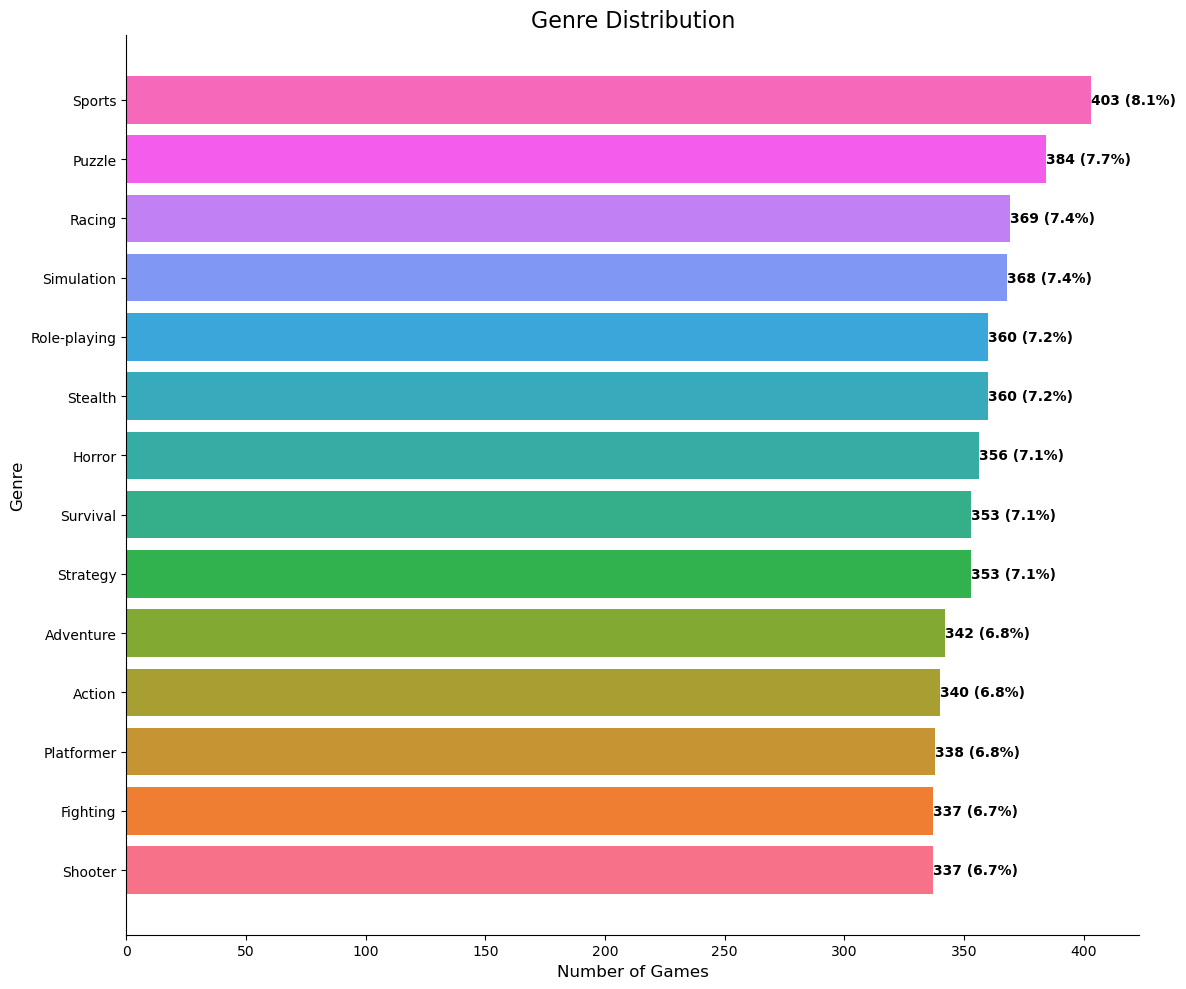

Top 5 Genres:
Sports: 403.0 (8.06%)
Puzzle: 384.0 (7.68%)
Racing: 369.0 (7.38%)
Simulation: 368.0 (7.36%)
Stealth: 360.0 (7.20%)


In [14]:
def genre_horizontal_bar_chart(df):
    # Calculate genre distribution
    genre_counts = df['Genre'].value_counts()
    genre_percentages = df['Genre'].value_counts(normalize=True) * 100

    # Create a DataFrame for the distribution
    genre_dist = pd.DataFrame({'Count': genre_counts, 'Percentage': genre_percentages})
    genre_dist = genre_dist.sort_values('Count', ascending=True)  # Sort ascending for horizontal bar chart

    # Create the plot
    plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
    
    # Create horizontal bar plot
    bars = plt.barh(genre_dist.index, genre_dist['Count'], color=sns.color_palette("husl", len(genre_dist)))
    
    # Customize the plot
    plt.title('Genre Distribution', fontsize=16)
    plt.xlabel('Number of Games', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Add value labels to the end of each bar
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width} ({genre_dist["Percentage"].iloc[i]:.1f}%)', 
                 ha='left', va='center', fontweight='bold')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print top 5 genres
    print("Top 5 Genres:")
    for genre, row in genre_dist.sort_values('Count', ascending=False).head().iterrows():
        print(f"{genre}: {row['Count']} ({row['Percentage']:.2f}%)")

# Call the function
genre_horizontal_bar_chart(df)

Heatmap of average settings by genres:

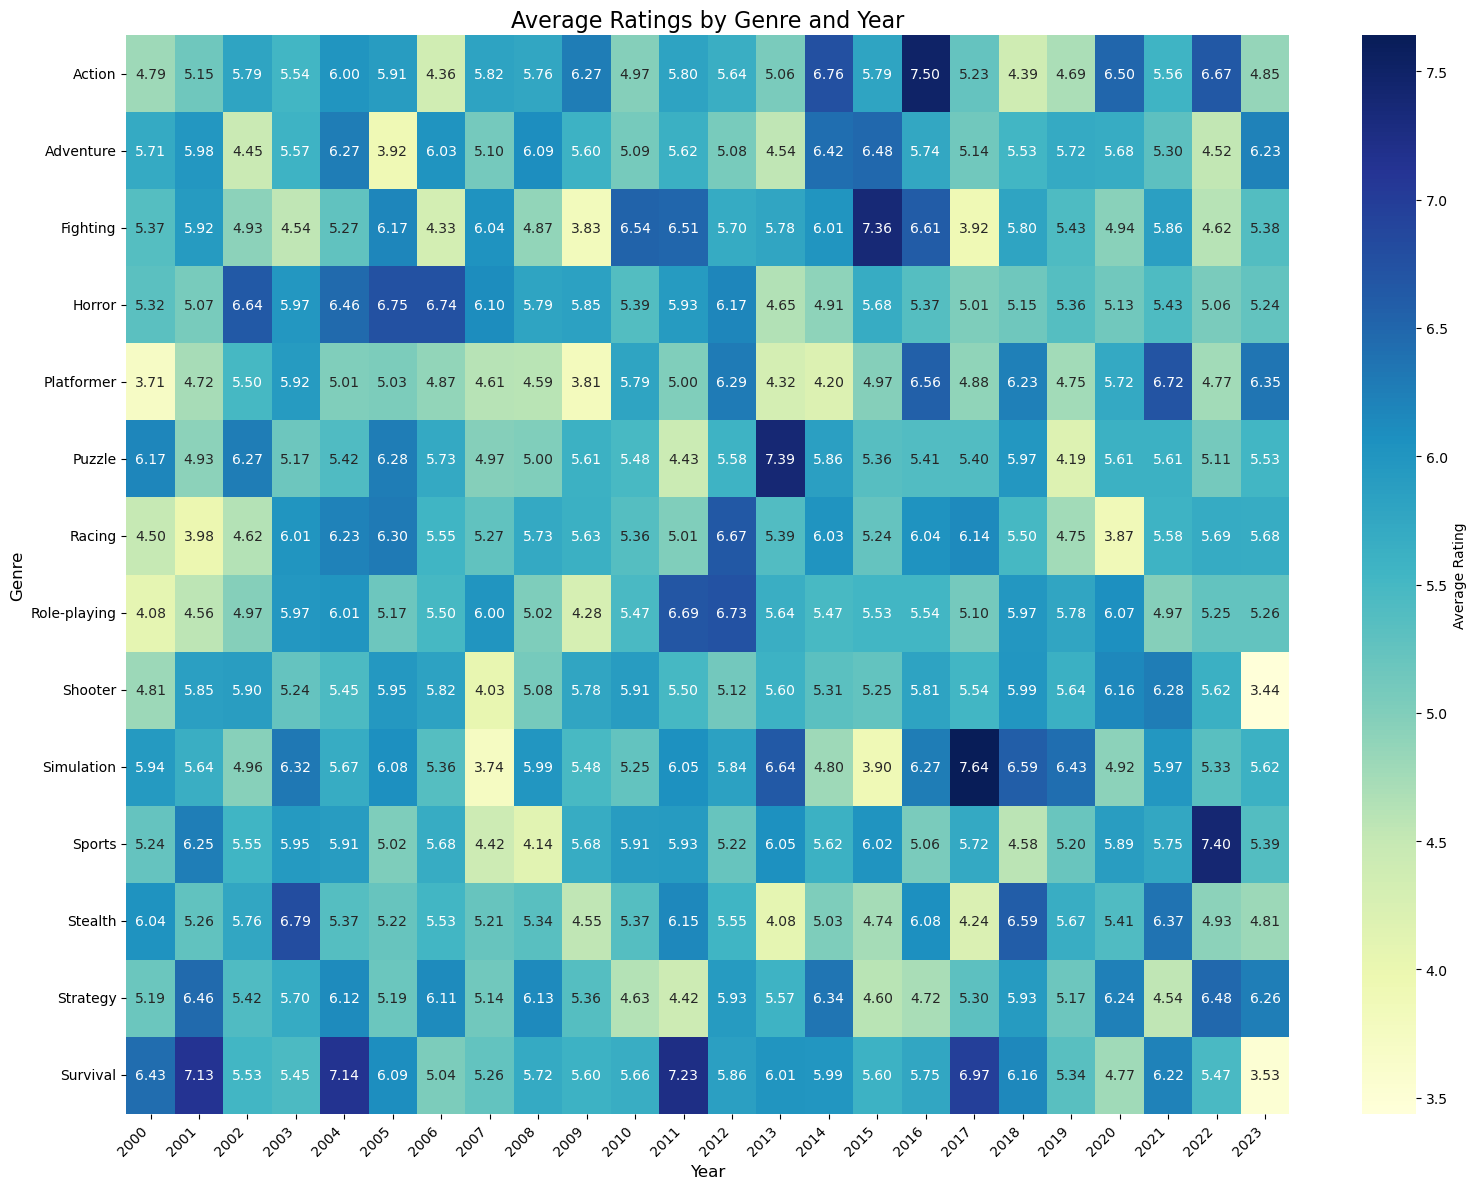

Genres with highest average ratings:
Genre
Survival      5.831706
Simulation    5.684145
Horror        5.632972
Action        5.615977
Sports        5.566711
Name: User Rating, dtype: float64

Years with highest average ratings:
Release Year
2016    5.889172
2004    5.882034
2012    5.811972
2018    5.741659
2011    5.732943
Name: User Rating, dtype: float64


In [15]:
# Heatmap of average user ratings by genre and release year:
def genre_ratings_heatmap(df):
    # Ensure 'Release Year' is treated as a categorical variable
    df['Release Year'] = df['Release Year'].astype(str)
    
    # Group the data by genre and year, and calculate the average rating for each group
    genre_ratings = df.groupby(['Genre', 'Release Year'])['User Rating'].mean().reset_index()
    
    # Pivot the data to create a matrix suitable for a heatmap
    heatmap_data = genre_ratings.pivot(index='Genre', columns='Release Year', values='User Rating')
    
    # Create the plot
    plt.figure(figsize=(16, 12))  # Adjust figure size as needed
    
    # Create heatmap using seaborn
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Rating'})
    
    # Set the title and axis labels
    plt.title('Average Ratings by Genre and Year', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout to prevent cutoff of labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print some additional information
    print("Genres with highest average ratings:")
    top_genres = genre_ratings.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).head()
    print(top_genres)
    
    print("\nYears with highest average ratings:")
    top_years = genre_ratings.groupby('Release Year')['User Rating'].mean().sort_values(ascending=False).head()
    print(top_years)

# Assuming df is your DataFrame
genre_ratings_heatmap(df)

Pie chart of platforms:

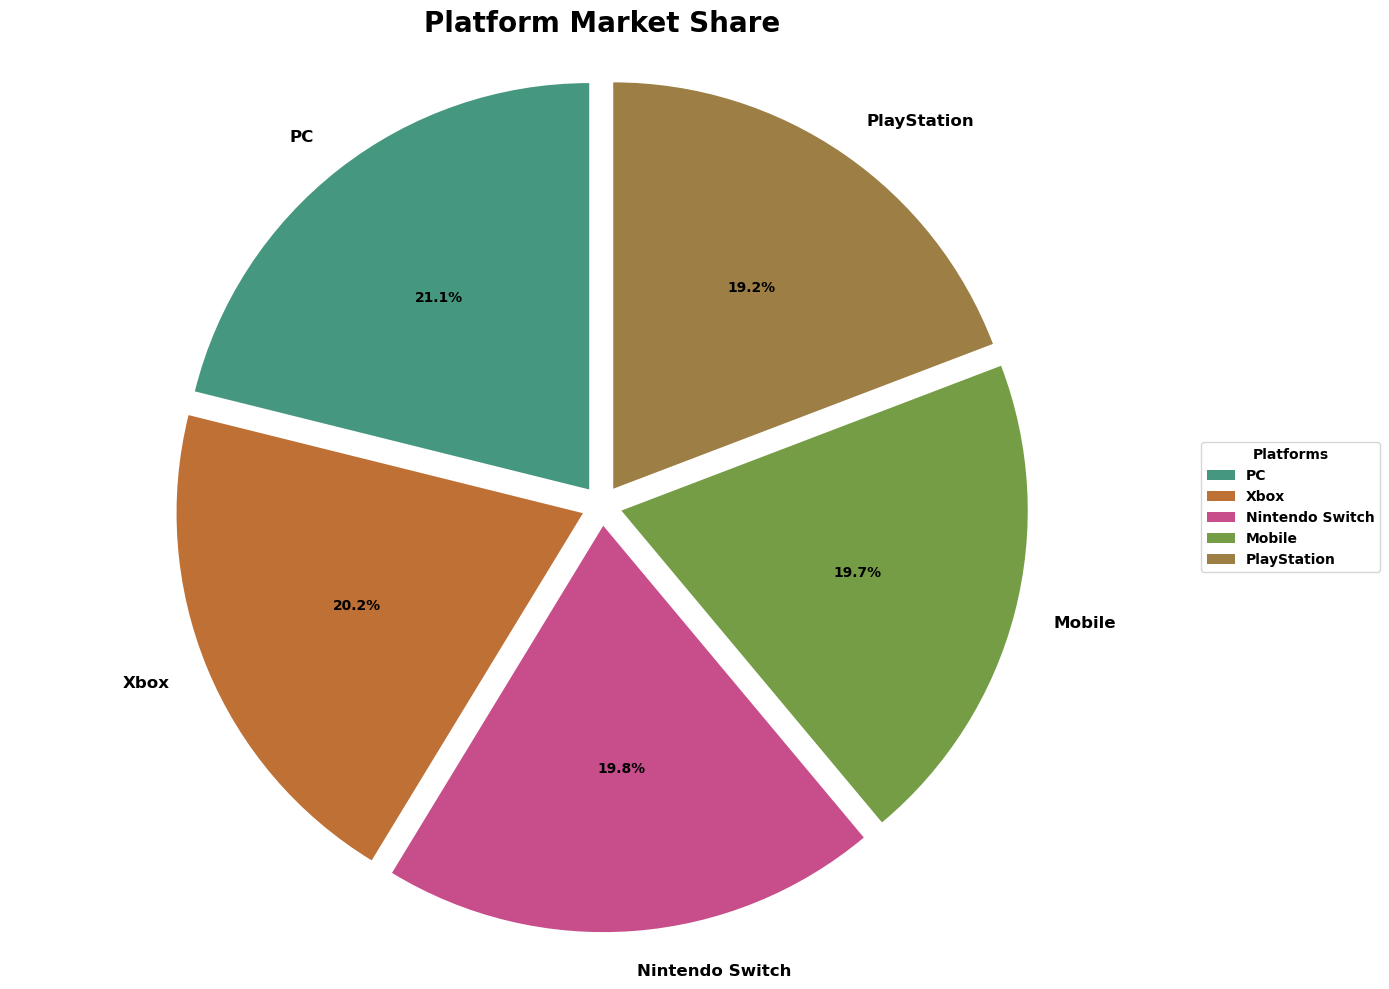

Total number of games by platform:
PC: 1056 games (21.1%)
Xbox: 1009 games (20.2%)
Nintendo Switch: 989 games (19.8%)
Mobile: 986 games (19.7%)
PlayStation: 960 games (19.2%)


In [16]:
# Broken pie chart:
def platform_games_analysis(df):
    # Calculate the platform counts
    platform_counts = df['Platform'].value_counts()

    # Create a new figure with a larger size
    plt.figure(figsize=(14, 10))

    # Define a darker color palette
    colors = plt.cm.Dark2(np.arange(len(platform_counts)) / len(platform_counts))
    
    # Make colors darker
    colors = np.array([np.array(c) * 0.8 for c in colors])

    # Create the pie chart
    wedges, texts, autotexts = plt.pie(platform_counts.values, 
                                       labels=platform_counts.index, 
                                       autopct='%1.1f%%', 
                                       startangle=90, 
                                       explode=[0.05] * len(platform_counts),
                                       colors=colors,
                                       shadow=False)  # Add shadow for 3D effect

    # Enhance the appearance of text - make labels and percentages bold
    plt.setp(autotexts, size=10, weight="bold", color="Black")
    plt.setp(texts, size=12, weight="bold")  # Make wedge labels bold

    # Add a title
    plt.title('Platform Market Share', fontsize=20, fontweight='bold')

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')  

    # Add a legend with bold text
    legend = plt.legend(title='Platforms', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(legend.get_title(), fontweight='bold')  # Make legend title bold
    for text in legend.get_texts():
        text.set_fontweight('bold')  # Make legend text bold

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print additional information
    print("Total number of games by platform:")
    for platform, count in platform_counts.items():
        print(f"{platform}: {count} games ({count/sum(platform_counts.values):.1%})")

# Assuming df is your DataFrame
platform_games_analysis(df)

Stakcker Chart with platform data:

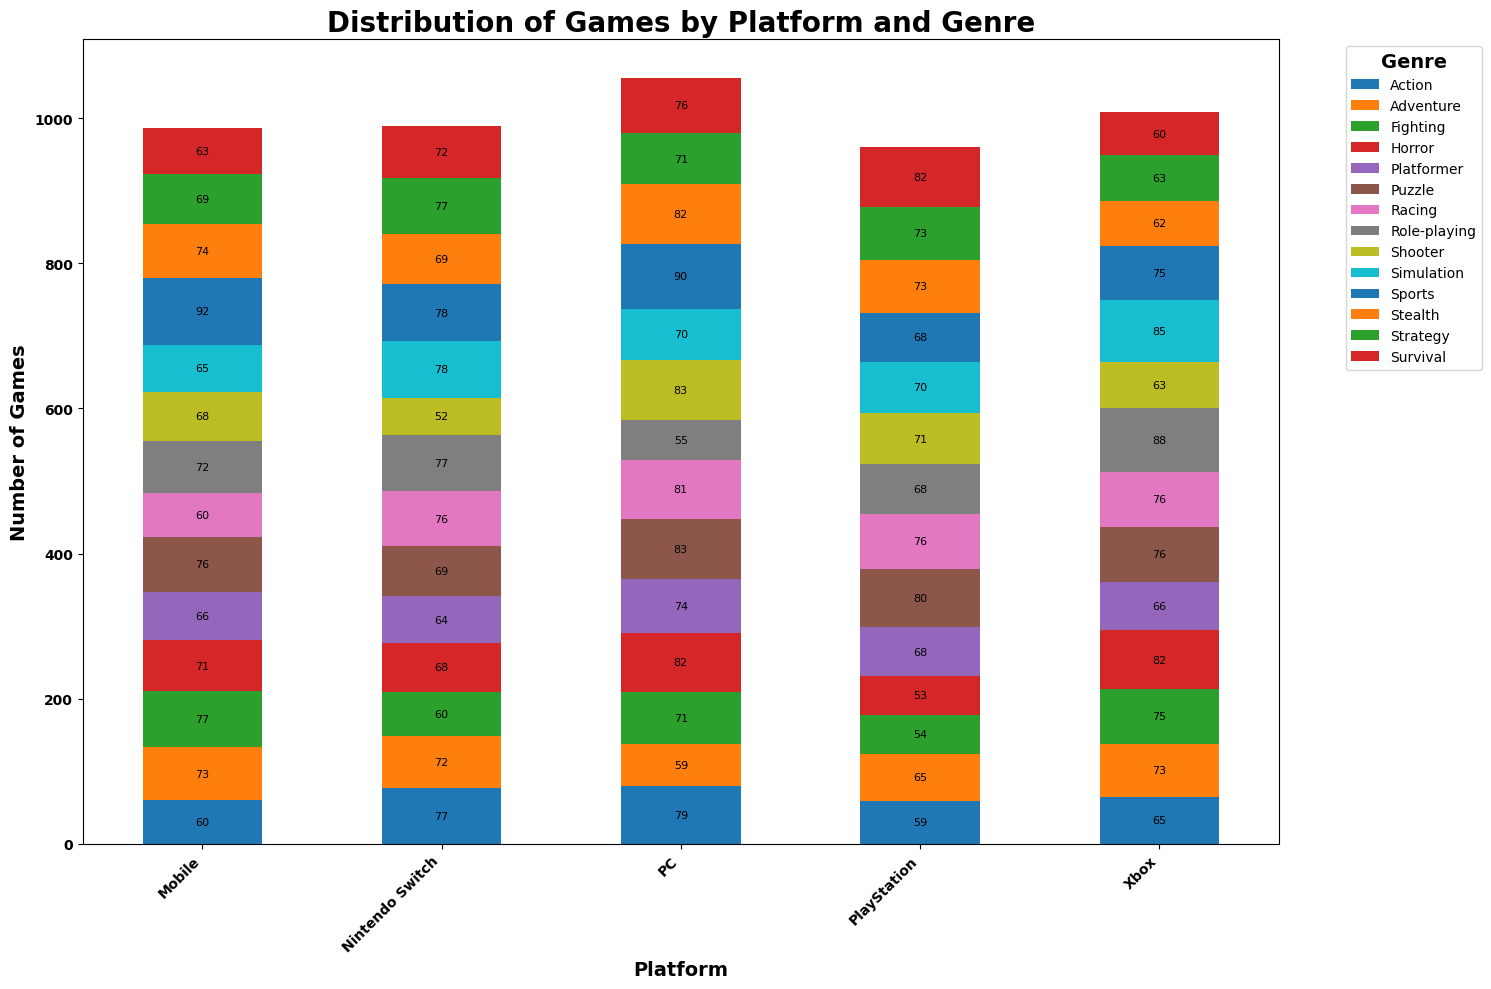

Total number of games by platform:
PC: 1056 games
Xbox: 1009 games
Nintendo Switch: 989 games
Mobile: 986 games
PlayStation: 960 games

Top 3 genres for each platform:

Mobile:
  Sports: 92 games
  Fighting: 77 games
  Puzzle: 76 games

Nintendo Switch:
  Simulation: 78 games
  Sports: 78 games
  Action: 77 games

PC:
  Sports: 90 games
  Puzzle: 83 games
  Shooter: 83 games

PlayStation:
  Survival: 82 games
  Puzzle: 80 games
  Racing: 76 games

Xbox:
  Role-playing: 88 games
  Simulation: 85 games
  Horror: 82 games


In [17]:
def create_stacked_chart(df):
    # Create a cross-tabulation of Platform and Genre:
    platform_genre = pd.crosstab(df['Platform'], df['Genre'])

    # Create a stacked bar chart:
    ax = platform_genre.plot(kind='bar', stacked=True, figsize=(15, 10))

    # Customize the chart:
    plt.title('Distribution of Games by Platform and Genre', fontsize=20, fontweight='bold')
    plt.xlabel('Platform', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Games', fontsize=14, fontweight='bold')
    
    # Rotate x-axis labels for better readability:
    plt.xticks(rotation=45, ha='right', fontweight='bold')
    plt.yticks(fontweight='bold')

    # Add a legend:
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.setp(ax.get_legend().get_title(), fontsize='14', fontweight='bold')

    # Add value labels on the bars:
    for c in ax.containers:
        ax.bar_label(c, label_type='center', fontsize=8)

    # Adjust layout and display the plot:
    plt.tight_layout()
    plt.show()

    # Print summary statistics:
    print("Total number of games by platform:")
    platform_totals = platform_genre.sum(axis=1).sort_values(ascending=False)
    for platform, count in platform_totals.items():
        print(f"{platform}: {count} games")

    print("\nTop 3 genres for each platform:")
    for platform in platform_genre.index:
        top_genres = platform_genre.loc[platform].nlargest(3)
        print(f"\n{platform}:")
        for genre, count in top_genres.items():
            print(f"  {genre}: {count} games")

# Assuming df is your DataFrame:
create_stacked_chart(df)

Stacked Bar Chart for top 3 genres  with platform by year:

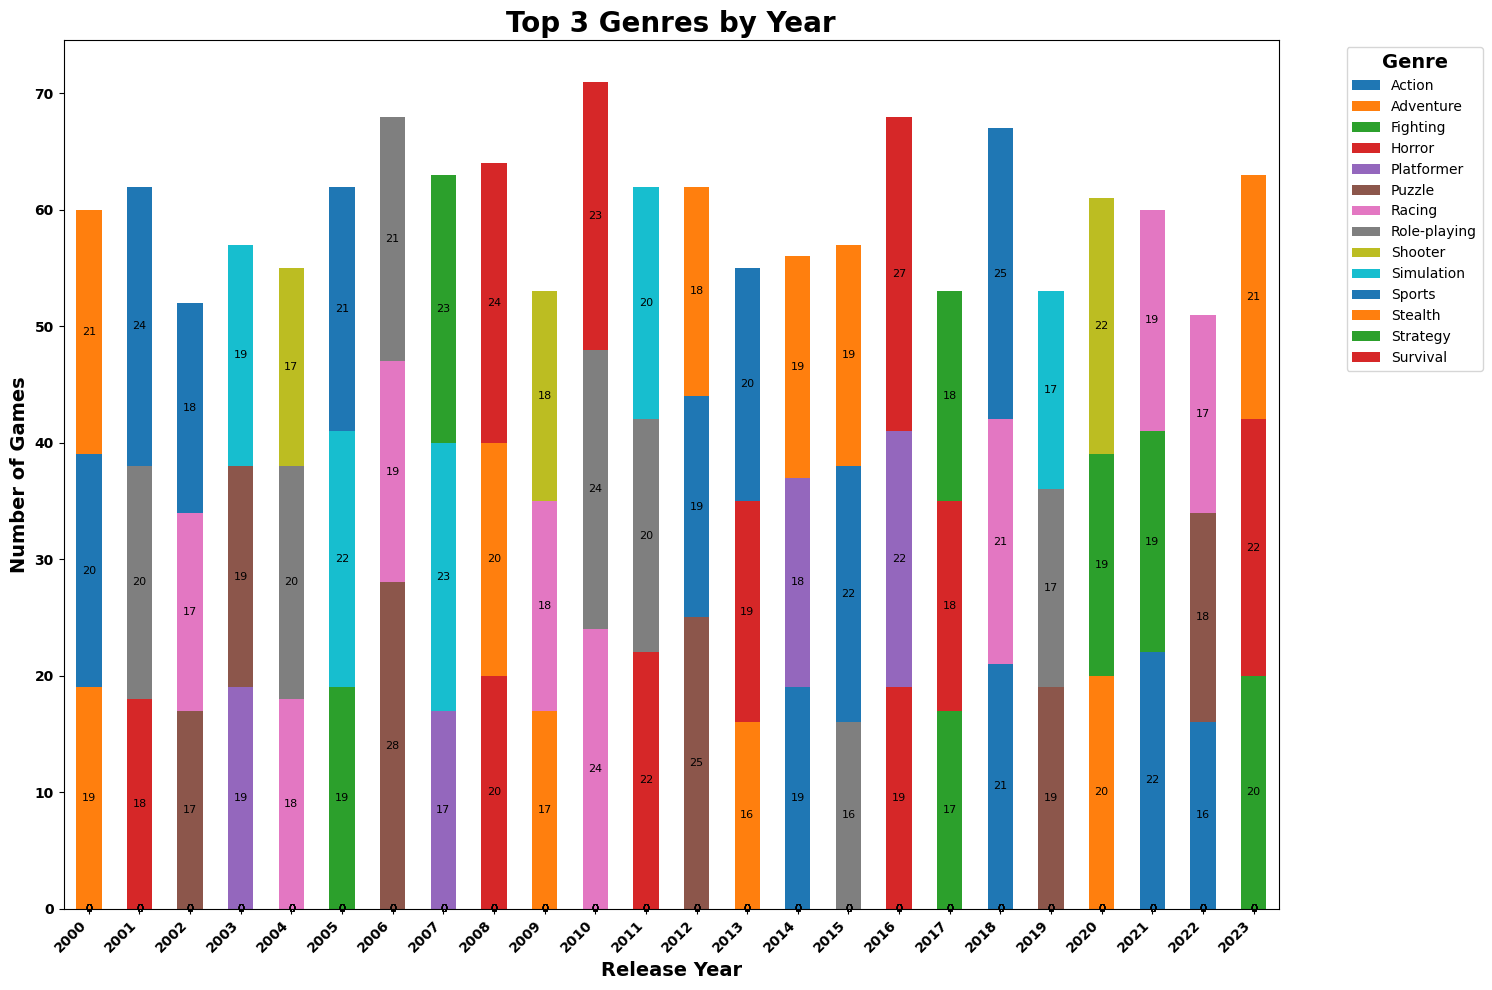

Top 3 genres for each year:

2000:
  Stealth: 21.0 games
  Sports: 20.0 games
  Adventure: 19.0 games

2001:
  Sports: 24.0 games
  Role-playing: 20.0 games
  Horror: 18.0 games

2002:
  Sports: 18.0 games
  Puzzle: 17.0 games
  Racing: 17.0 games

2003:
  Platformer: 19.0 games
  Puzzle: 19.0 games
  Simulation: 19.0 games

2004:
  Role-playing: 20.0 games
  Racing: 18.0 games
  Shooter: 17.0 games

2005:
  Simulation: 22.0 games
  Sports: 21.0 games
  Fighting: 19.0 games

2006:
  Puzzle: 28.0 games
  Role-playing: 21.0 games
  Racing: 19.0 games

2007:
  Simulation: 23.0 games
  Strategy: 23.0 games
  Platformer: 17.0 games

2008:
  Survival: 24.0 games
  Horror: 20.0 games
  Stealth: 20.0 games

2009:
  Racing: 18.0 games
  Shooter: 18.0 games
  Adventure: 17.0 games

2010:
  Racing: 24.0 games
  Role-playing: 24.0 games
  Survival: 23.0 games

2011:
  Horror: 22.0 games
  Role-playing: 20.0 games
  Simulation: 20.0 games

2012:
  Puzzle: 25.0 games
  Sports: 19.0 games
  Stealth: 

In [18]:
# Stacked bar chart top 3 genre by years:
def create_top_genres_by_year_chart(df):
    # Group by Year and Genre, count the games
    year_genre_counts = df.groupby(['Release Year', 'Genre']).size().unstack(fill_value=0)
    
    # For each year, keep only the top 3 genres
    top_3_genres = year_genre_counts.apply(lambda x: x.nlargest(3), axis=1)
    
    # Fill NaN values with 0
    top_3_genres = top_3_genres.fillna(0)
    
    # Sort years in ascending order
    top_3_genres = top_3_genres.sort_index()

    # Create a stacked bar chart
    ax = top_3_genres.plot(kind='bar', stacked=True, figsize=(15, 10))

    # Customize the chart
    plt.title('Top 3 Genres by Year', fontsize=20, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Games', fontsize=14, fontweight='bold')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontweight='bold')
    plt.yticks(fontweight='bold')

    # Add a legend
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.setp(ax.get_legend().get_title(), fontsize='14', fontweight='bold')

    # Add value labels on the bars
    for c in ax.containers:
        ax.bar_label(c, label_type='center', fontsize=8)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Top 3 genres for each year:")
    for year in top_3_genres.index:
        top_genres = top_3_genres.loc[year].nlargest(3)
        print(f"\n{year}:")
        for genre, count in top_genres.items():
            if count > 0:  # Only print if there are games in this genre
                print(f"  {genre}: {count} games")

# Assuming df is your DataFrame
create_top_genres_by_year_chart(df)


Bubble Charts:

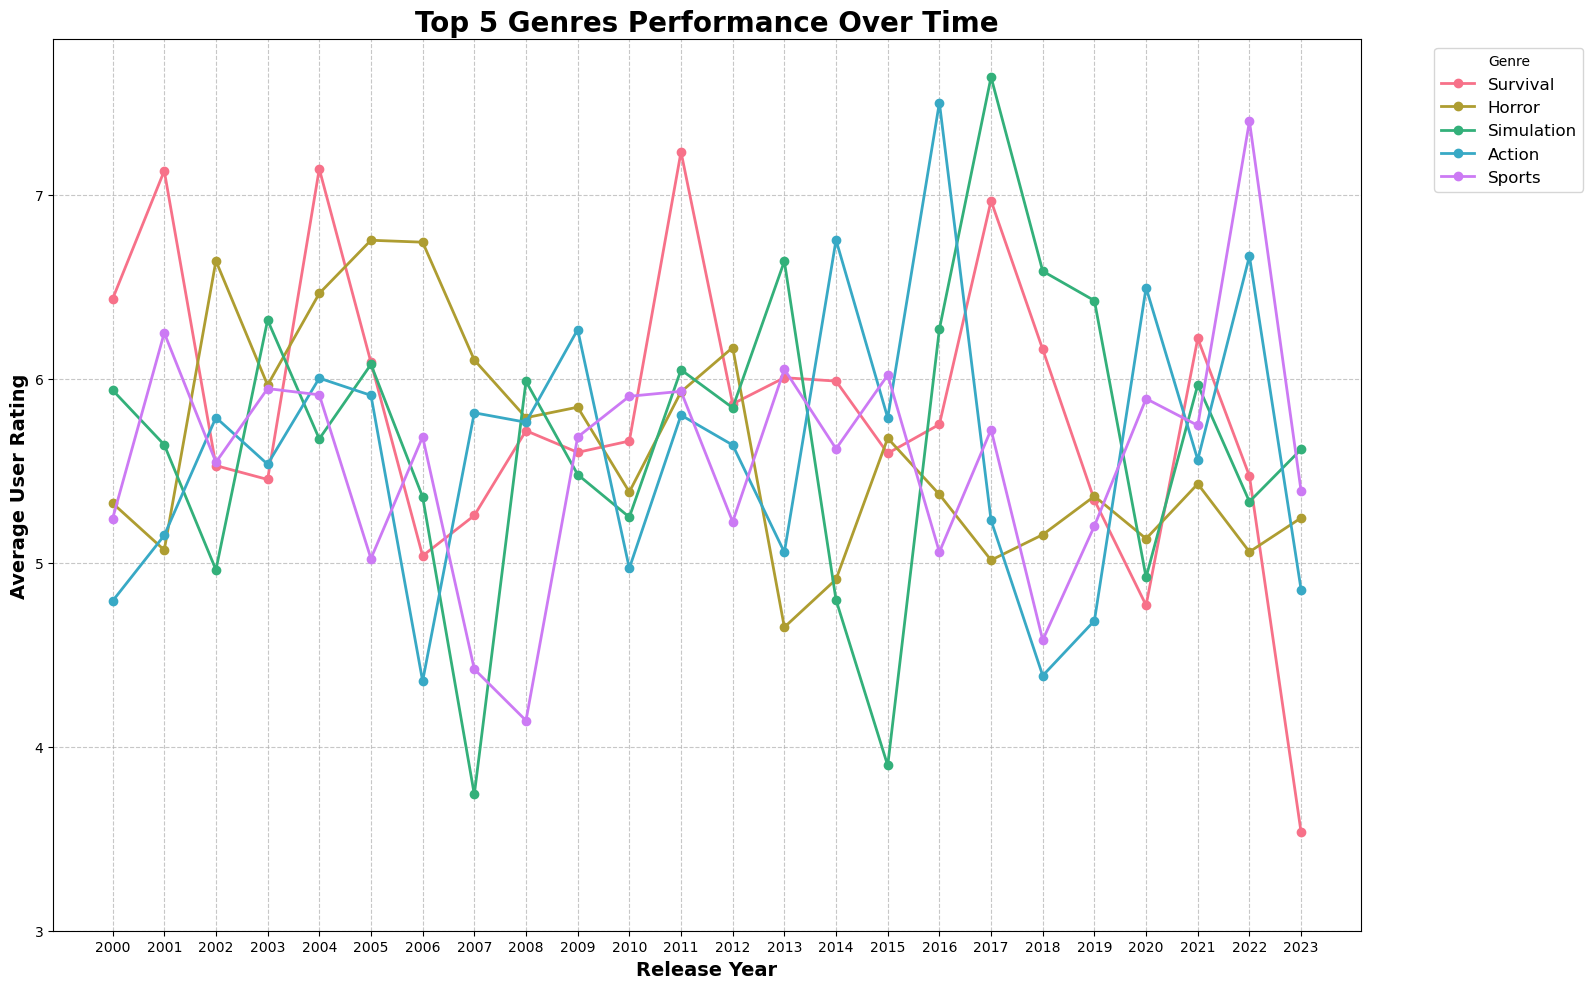

Top 5 genres by overall average rating:
Survival: 5.83
Horror: 5.63
Simulation: 5.63
Action: 5.60
Sports: 5.56

Performance change for top 5 genres (comparing first and last year):
Survival: -2.90 change in rating
Horror: -0.08 change in rating
Simulation: -0.32 change in rating
Action: 0.06 change in rating
Sports: 0.15 change in rating


In [19]:
def top_5_genres_performance_over_time(df):
    # Calculate overall average rating for each genre
    overall_avg = df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False)
    
    # Select top 5 genres
    top_5_genres = overall_avg.head(5).index.tolist()

    # Filter the dataframe for top 5 genres
    df_top_5 = df[df['Genre'].isin(top_5_genres)]

    # Group by Year and Genre, calculate average rating
    genre_performance = df_top_5.groupby(['Release Year', 'Genre'])['User Rating'].mean().unstack()

    # Create the line plot
    plt.figure(figsize=(16, 10))
    
    # Set a color palette
    colors = sns.color_palette("husl", n_colors=5)
    
    # Plot each genre
    for i, genre in enumerate(top_5_genres):
        plt.plot(genre_performance.index, genre_performance[genre], marker='o', label=genre, linewidth=2, color=colors[i])

    # Customize the chart
    plt.title('Top 5 Genres Performance Over Time', fontsize=20, fontweight='bold')
    plt.xlabel('Release Year', fontsize=14, fontweight='bold')
    plt.ylabel('Average User Rating', fontsize=14, fontweight='bold')
    
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set y-axis to start from 0
    plt.ylim(bottom=3)
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Top 5 genres by overall average rating:")
    for genre, avg_rating in overall_avg.head().items():
        print(f"{genre}: {avg_rating:.2f}")

    print("\nPerformance change for top 5 genres (comparing first and last year):")
    first_year = genre_performance.index.min()
    last_year = genre_performance.index.max()
    improvement = genre_performance.loc[last_year] - genre_performance.loc[first_year]
    for genre in top_5_genres:
        change = improvement[genre]
        print(f"{genre}: {change:.2f} change in rating")

# Assuming df is your DataFrame
top_5_genres_performance_over_time(df)